In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import spearmanr
#to ignore warnings
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')

In [27]:
#loading data
csv_file_path = 'alzheimers_disease_data.csv'
df = pd.read_csv(csv_file_path)

In [28]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [29]:
df = df.drop(columns=['DoctorInCharge'])
df['PatientID'] = range(1, len(df) + 1)
df.head(50)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,1,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,2,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,3,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,5,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
5,6,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,5.510144,0,0,9.015686,1,0,0,0,0,0
6,7,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,6.062124,0,0,9.236328,0,0,0,0,1,0
7,8,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,3.401374,0,0,4.517248,1,0,0,0,1,1
8,9,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,7.396061,0,1,0.756232,0,0,1,0,0,0
9,10,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,1.148904,0,1,4.554394,0,0,0,0,0,0


In [31]:
#data cleaning
missing_values = df.isnull().sum()
print(missing_values)
duplicates = df.duplicated().sum()
print(duplicates) 
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)
summary_stats = df.describe(include='all')
print(summary_stats)
print(df.dtypes)

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [32]:
#feature scaling and splitting dataset
linear_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 
    'DietQuality', 'SleepQuality', 'SystolicBP', 
    'DiastolicBP', 'CholesterolTotal', 
    'CholesterolLDL', 'CholesterolHDL', 
    'CholesterolTriglycerides', 'MMSE', 
    'FunctionalAssessment', 'ADL'
]
categorical_features = ['Ethnicity']
X = df.iloc[:, :-1] 
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), linear_features),  # Standardize numeric features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ]
)


In [33]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [34]:
column_names = (
    linear_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)
X_train_scaled_df = pd.DataFrame(X_train_transformed, columns=column_names)
X_test_scaled_df = pd.DataFrame(X_test_transformed, columns=column_names)

# Display results
print("Transformed Training Data:")
print(X_train_scaled_df)
print("\nTransformed Test Data:")
print(X_test_scaled_df)

Transformed Training Data:
           Age       BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0     1.230721  0.065466            1.478214          0.571099    -1.276449   
1    -1.430841  0.070065           -0.407432         -1.050032     0.340303   
2     0.010838 -0.316941           -0.288334          1.628134    -1.119152   
3     1.563416 -0.567289           -1.418146         -1.257326     1.279730   
4     0.121737  1.533521           -0.190409          1.188813     0.982253   
...        ...       ...                 ...               ...          ...   
1714 -1.652638  0.517706           -1.452272         -0.777907    -0.606789   
1715 -1.652638 -1.014042            1.158931         -0.536804    -1.132084   
1716  0.010838 -0.976571           -0.720439          1.742336    -1.218735   
1717  0.121737  0.818305           -0.837621          1.602655    -0.741647   
1718 -0.876349 -1.476374           -0.701466         -0.456461    -0.034768   

      SleepQuality  Syst

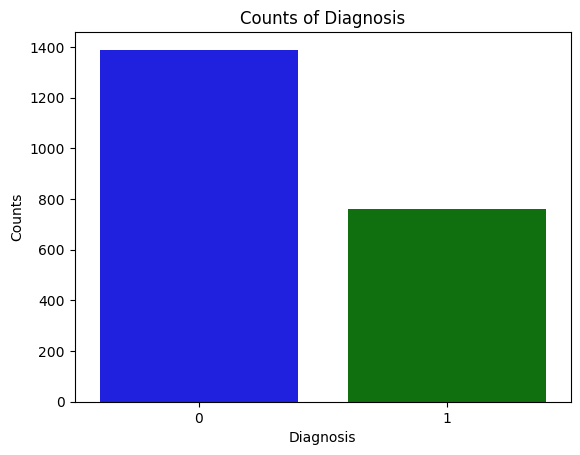

Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [35]:
#EDA
# Distribution of diagnosis
sns.countplot(x=df["Diagnosis"] ,data=df, palette=["blue", "green"])
plt.xlabel("Diagnosis")
plt.ylabel("Counts")
plt.title("Counts of Diagnosis")
plt.show()
# Value counts
print(df['Diagnosis'].value_counts())

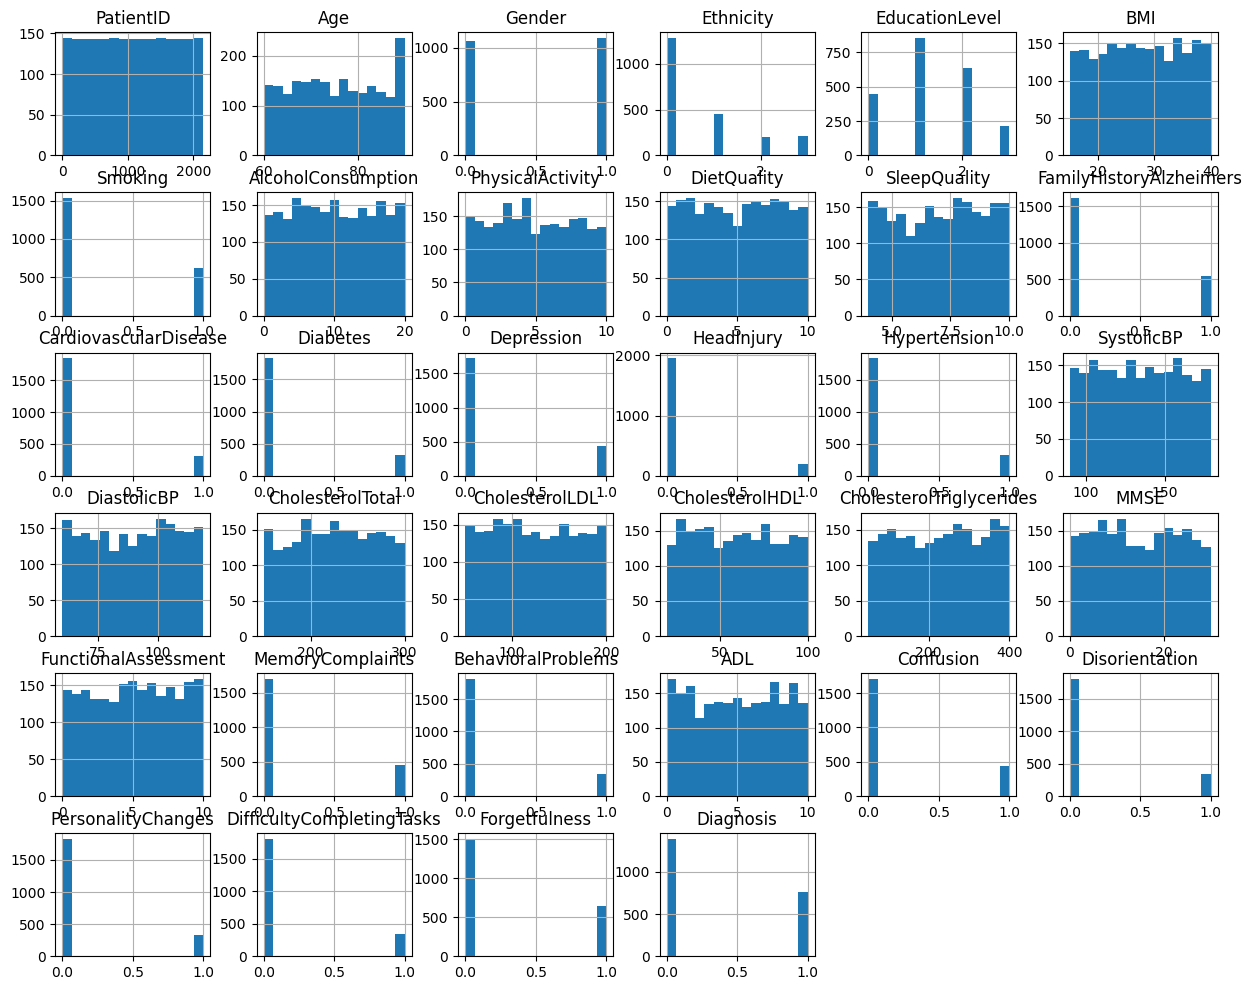

In [10]:
# Distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

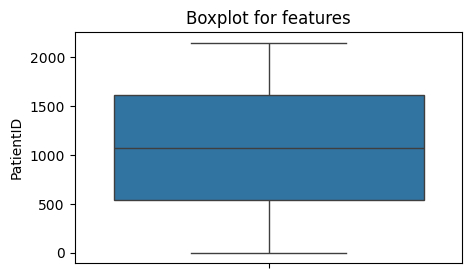

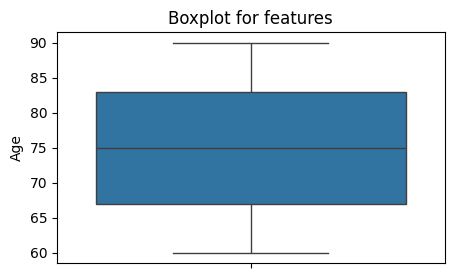

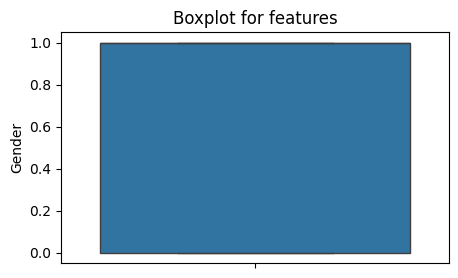

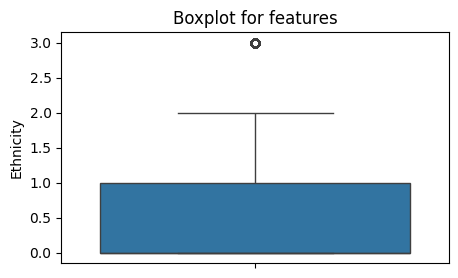

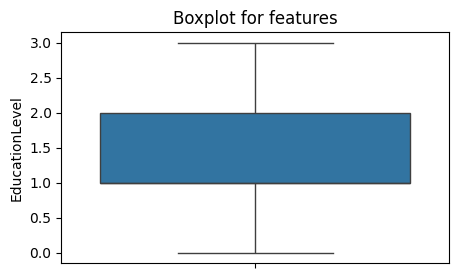

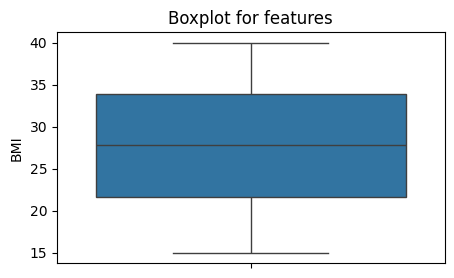

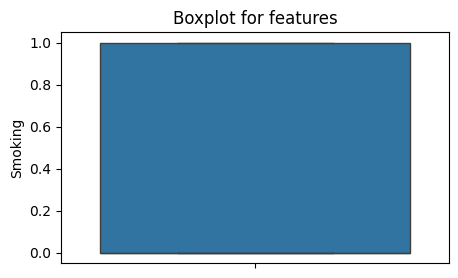

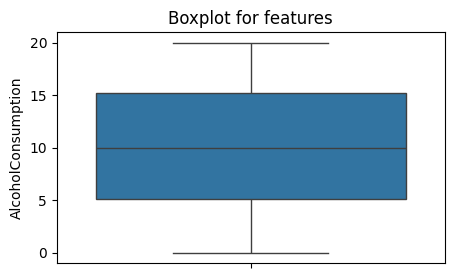

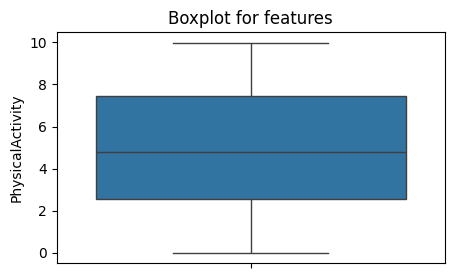

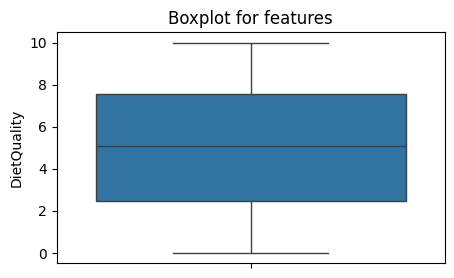

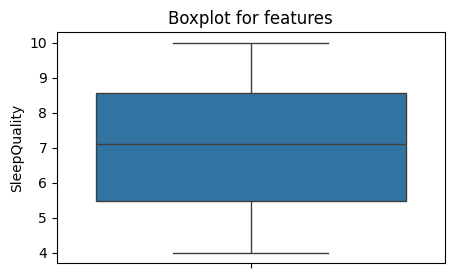

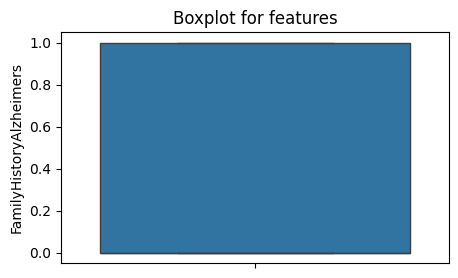

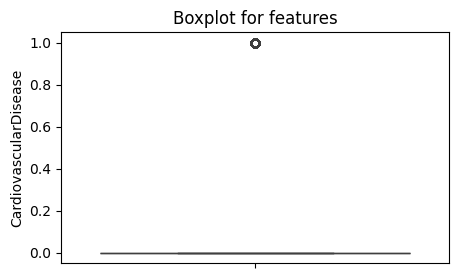

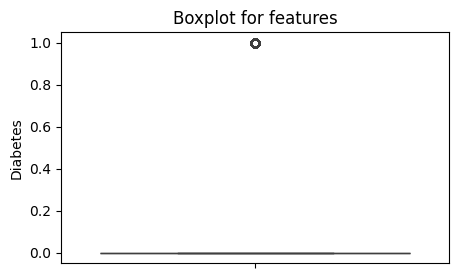

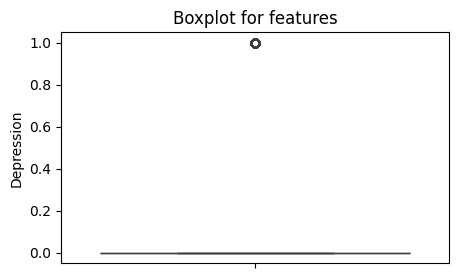

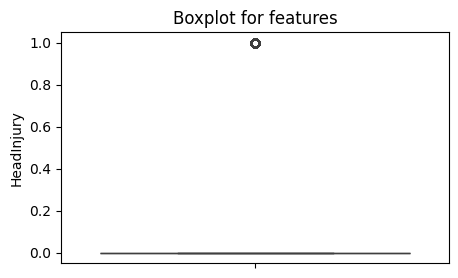

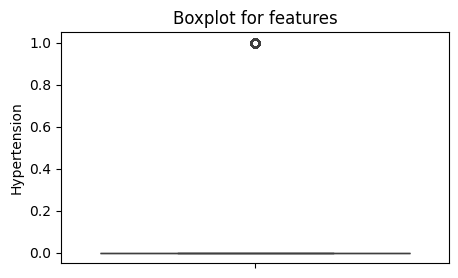

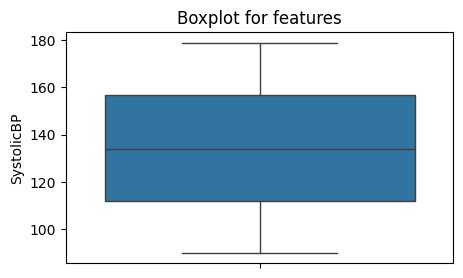

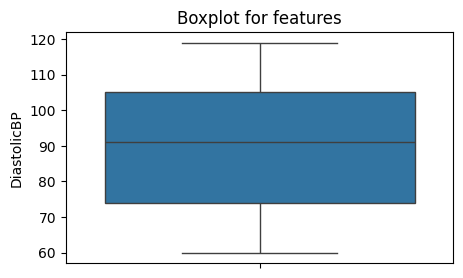

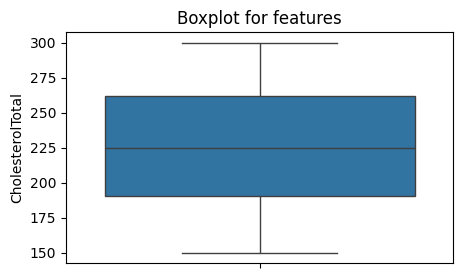

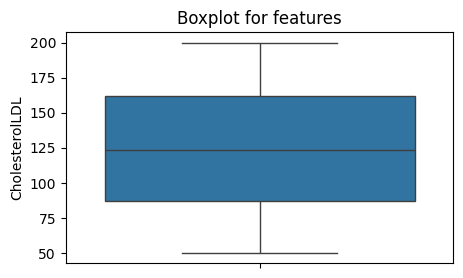

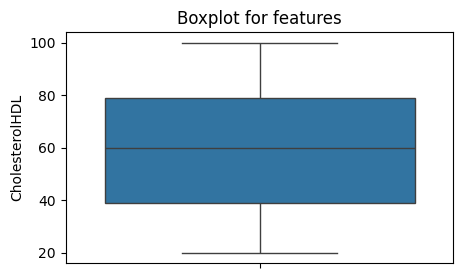

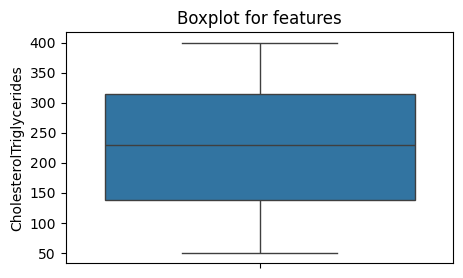

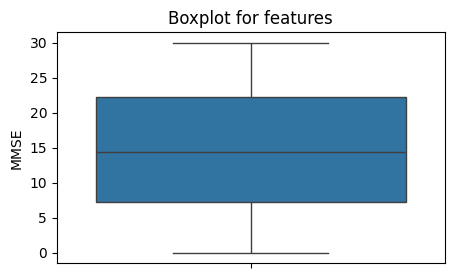

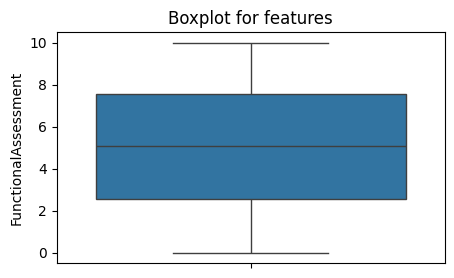

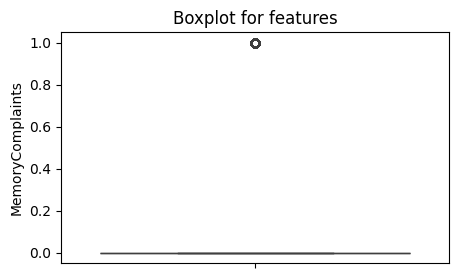

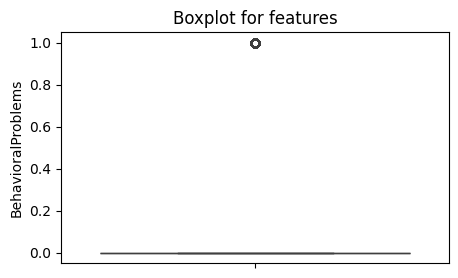

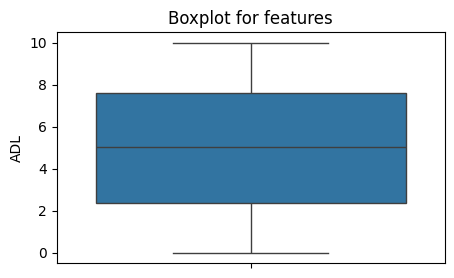

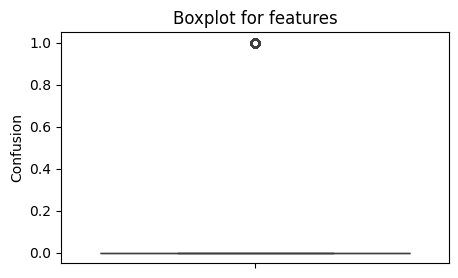

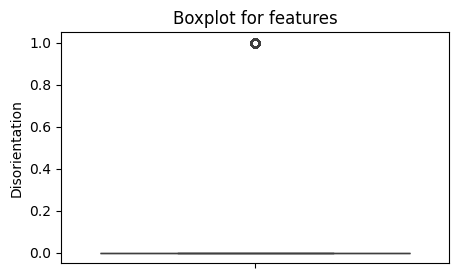

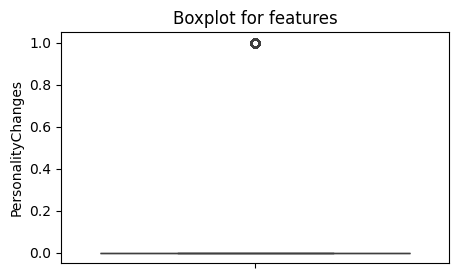

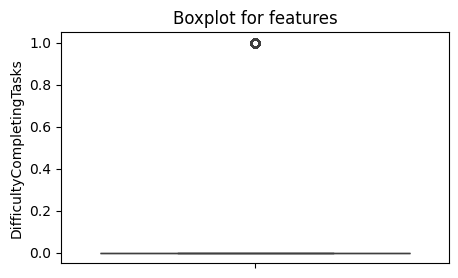

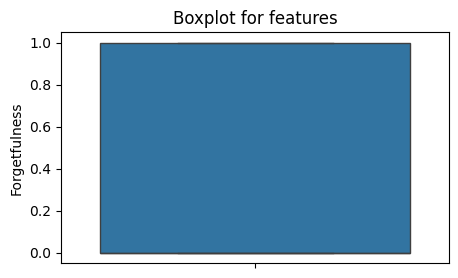

In [11]:
features = df.iloc[:, :-1] 
for i in features:
    plt.figure(figsize=(5, 3)) 
    sns.boxplot(y=df[i]) 
    plt.title(f'Boxplot for features') 
    plt.show()  

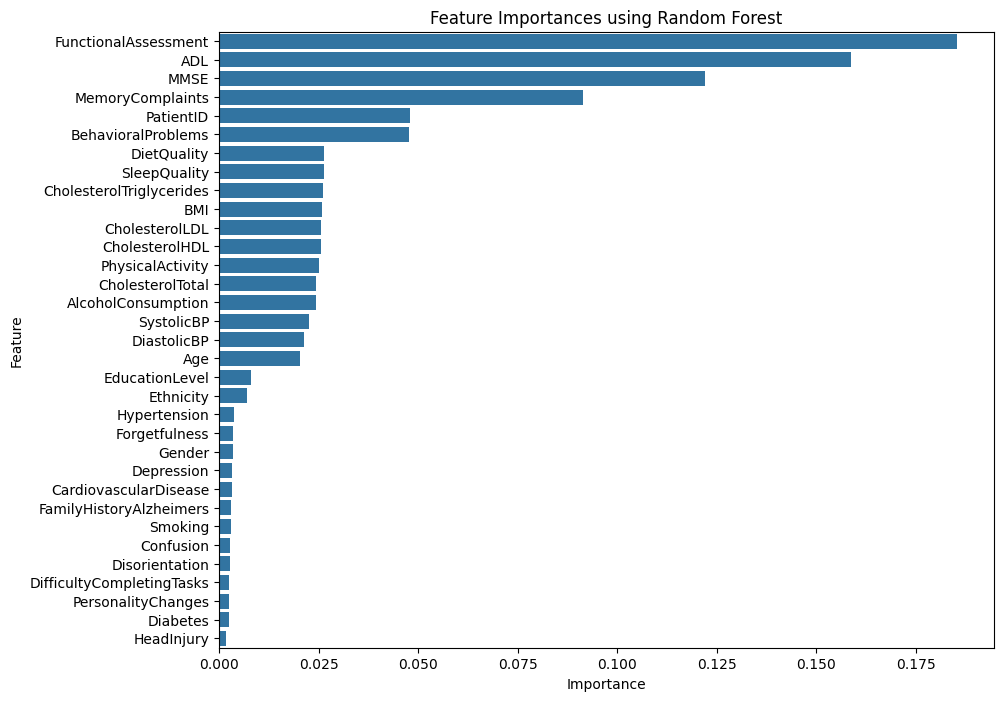


Dataset with top_5_features:
      FunctionalAssessment       ADL       MMSE  MemoryComplaints  PatientID
780               5.566873  0.232938  20.610337                 0        781
1341              9.307896  0.442326   8.973483                 0       1342
820               4.001694  4.918146  11.968872                 0        821
857               9.700073  5.157190  27.648573                 1        858
593               8.626984  9.413984  25.410148                 0        594

Dataset with top_10_features:
      FunctionalAssessment       ADL       MMSE  MemoryComplaints  PatientID  \
780               5.566873  0.232938  20.610337                 0        781   
1341              9.307896  0.442326   8.973483                 0       1342   
820               4.001694  4.918146  11.968872                 0        821   
857               9.700073  5.157190  27.648573                 1        858   
593               8.626984  9.413984  25.410148                 0        594 

In [36]:
#Feature selection
#Feature Importance using Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
forest_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=forest_importances)
plt.title("Feature Importances using Random Forest")
plt.show()

top_features_datasets = {}

for n_features in [5, 10, 15, 20, 25, 30]:
    top_n_features = forest_importances['Feature'].head(n_features)
    X_top_n = X_train[top_n_features]  # Select only the top n features from X_train
    top_features_datasets[f'top_{n_features}_features'] = X_top_n

# Display the top features datasets
for key, dataset in top_features_datasets.items():
    print(f"\nDataset with {key}:")
    print(dataset.head())

In [13]:
#Feature selection using SelectKBest (Anova )
selector = SelectKBest(f_classif, k=20)
X_best = selector.fit_transform(X, y)
selected_features_anova = X.columns[selector.get_support()]
print(selected_features_anova)

Index(['PatientID', 'Gender', 'EducationLevel', 'BMI', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'HeadInjury', 'Hypertension', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Disorientation',
       'PersonalityChanges'],
      dtype='object')


In [14]:
#Feature selection using mutual information
mi_scores = mutual_info_classif(X, y)

# DataFrame to view feature importance
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information Scores:")
print(mi_scores_df)

# You can then select features based on a threshold or top k features
# Example: Select features with MI score above 0.1
selected_features = mi_scores_df[mi_scores_df['Mutual Information'] > 0.05]['Feature']
X_selected = X[selected_features]

print("\nSelected Features Based on Mutual Information:")
print(X_selected.head())

Mutual Information Scores:
                      Feature  Mutual Information
24       FunctionalAssessment            0.095454
27                        ADL            0.076564
23                       MMSE            0.066278
25           MemoryComplaints            0.051313
0                   PatientID            0.021420
7          AlcoholConsumption            0.017780
21             CholesterolHDL            0.017349
26         BehavioralProblems            0.014875
4              EducationLevel            0.011896
10               SleepQuality            0.009691
15                 HeadInjury            0.008398
8            PhysicalActivity            0.007947
32              Forgetfulness            0.004487
28                  Confusion            0.003694
3                   Ethnicity            0.003621
16               Hypertension            0.002873
19           CholesterolTotal            0.000338
6                     Smoking            0.000000
31  DifficultyCompletin

In [15]:
#baseline model
from sklearn.model_selection import StratifiedKFold, cross_val_predict
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
accuracy_dt = cross_val_score(decision_tree, X_train, y_train, cv=skf, scoring='accuracy')
precision_dt = cross_val_score(decision_tree, X_train, y_train, cv=skf, scoring='precision')
recall_dt = cross_val_score(decision_tree, X_train, y_train, cv=skf, scoring='recall')
f1_dt = cross_val_score(decision_tree, X_train, y_train, cv=skf, scoring='f1')

print("Decision Tree - K-Fold Cross-Validation Results:")
print(f"  Accuracy: {accuracy_dt.mean():.4f} ± {accuracy_dt.std():.4f}")
print(f"  Precision: {precision_dt.mean():.4f} ± {precision_dt.std():.4f}")
print(f"  Recall: {recall_dt.mean():.4f} ± {recall_dt.std():.4f}")
print(f"  F1 Score: {f1_dt.mean():.4f} ± {f1_dt.std():.4f}")

# Random Forest model
random_forest = RandomForestClassifier(random_state=42)
accuracy_rf = cross_val_score(random_forest, X_train, y_train, cv=skf, scoring='accuracy')
precision_rf = cross_val_score(random_forest, X_train, y_train, cv=skf, scoring='precision')
recall_rf = cross_val_score(random_forest, X_train, y_train, cv=skf, scoring='recall')
f1_rf = cross_val_score(random_forest, X_train, y_train, cv=skf, scoring='f1')

print("\nRandom Forest - K-Fold Cross-Validation Results:")
print(f"  Accuracy: {accuracy_rf.mean():.4f} ± {accuracy_rf.std():.4f}")
print(f"  Precision: {precision_rf.mean():.4f} ± {precision_rf.std():.4f}")
print(f"  Recall: {recall_rf.mean():.4f} ± {recall_rf.std():.4f}")
print(f"  F1 Score: {f1_rf.mean():.4f} ± {f1_rf.std():.4f}")

# XGBoost model
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
accuracy_xgb = cross_val_score(xgboost, X_train, y_train, cv=skf, scoring='accuracy')
precision_xgb = cross_val_score(xgboost, X_train, y_train, cv=skf, scoring='precision')
recall_xgb = cross_val_score(xgboost, X_train, y_train, cv=skf, scoring='recall')
f1_xgb = cross_val_score(xgboost, X_train, y_train, cv=skf, scoring='f1')

print("\nXGBoost - K-Fold Cross-Validation Results:")
print(f"  Accuracy: {accuracy_xgb.mean():.4f} ± {accuracy_xgb.std():.4f}")
print(f"  Precision: {precision_xgb.mean():.4f} ± {precision_xgb.std():.4f}")
print(f"  Recall: {recall_xgb.mean():.4f} ± {recall_xgb.std():.4f}")
print(f"  F1 Score: {f1_xgb.mean():.4f} ± {f1_xgb.std():.4f}")


Decision Tree - K-Fold Cross-Validation Results:
  Accuracy: 0.9407 ± 0.0067
  Precision: 0.9224 ± 0.0217
  Recall: 0.9095 ± 0.0116
  F1 Score: 0.9157 ± 0.0088

Random Forest - K-Fold Cross-Validation Results:
  Accuracy: 0.9308 ± 0.0132
  Precision: 0.9435 ± 0.0256
  Recall: 0.8568 ± 0.0431
  F1 Score: 0.8971 ± 0.0217

XGBoost - K-Fold Cross-Validation Results:
  Accuracy: 0.9575 ± 0.0051
  Precision: 0.9390 ± 0.0224
  Recall: 0.9424 ± 0.0282
  F1 Score: 0.9400 ± 0.0076


In [16]:
#two additional models
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# SVM model
svm = SVC(probability=True, random_state=42)
accuracy_svm = cross_val_score(svm, X_train, y_train, cv=skf, scoring='accuracy')
precision_svm = cross_val_score(svm, X_train, y_train, cv=skf, scoring='precision')
recall_svm = cross_val_score(svm, X_train, y_train, cv=skf, scoring='recall')
f1_svm = cross_val_score(svm, X_train, y_train, cv=skf, scoring='f1')

print("SVM - K-Fold Cross-Validation Results:")
print(f"  Accuracy: {accuracy_svm.mean():.4f} ± {accuracy_svm.std():.4f}")
print(f"  Precision: {precision_svm.mean():.4f} ± {precision_svm.std():.4f}")
print(f"  Recall: {recall_svm.mean():.4f} ± {recall_svm.std():.4f}")
print(f"  F1 Score: {f1_svm.mean():.4f} ± {f1_svm.std():.4f}")

# Multi-Layer Perceptron model
mlp = MLPClassifier(random_state=42, max_iter=1000)
accuracy_mlp = cross_val_score(mlp, X_train, y_train, cv=skf, scoring='accuracy')
precision_mlp = cross_val_score(mlp, X_train, y_train, cv=skf, scoring='precision')
recall_mlp = cross_val_score(mlp, X_train, y_train, cv=skf, scoring='recall')
f1_mlp = cross_val_score(mlp, X_train, y_train, cv=skf, scoring='f1')

print("\nMulti-Layer Perceptron - K-Fold Cross-Validation Results:")
print(f"  Accuracy: {accuracy_mlp.mean():.4f} ± {accuracy_mlp.std():.4f}")
print(f"  Precision: {precision_mlp.mean():.4f} ± {precision_mlp.std():.4f}")
print(f"  Recall: {recall_mlp.mean():.4f} ± {recall_mlp.std():.4f}")
print(f"  F1 Score: {f1_mlp.mean():.4f} ± {f1_mlp.std():.4f}")

SVM - K-Fold Cross-Validation Results:
  Accuracy: 0.6463 ± 0.0012
  Precision: 0.0000 ± 0.0000
  Recall: 0.0000 ± 0.0000
  F1 Score: 0.0000 ± 0.0000

Multi-Layer Perceptron - K-Fold Cross-Validation Results:
  Accuracy: 0.7458 ± 0.0842
  Precision: 0.6840 ± 0.1362
  Recall: 0.7363 ± 0.2201
  F1 Score: 0.6634 ± 0.0941


In [17]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'select__k': [10, 20, 30]
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
}

param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 10],
    'select__k': [10, 20, 30]
}




pipeline_dt = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_xgb = Pipeline([
    ('select', SelectKBest(score_func=mutual_info_classif)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])




grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=skf, scoring='accuracy')
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=skf, scoring='accuracy')
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=skf, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)



print("Decision Tree Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree Best Score:", grid_search_dt.best_score_)

print("\nRandom Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("\nXGBoost Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost Best Score:", grid_search_xgb.best_score_)

Decision Tree Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'select__k': 30}
Decision Tree Best Score: 0.9470675978032409

Random Forest Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Random Forest Best Score: 0.9400705132551359

XGBoost Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'select__k': 30}
XGBoost Best Score: 0.9604464709471829


In [18]:

from sklearn.feature_selection import SelectKBest, mutual_info_classif



# Function to evaluate the model using cross-validation and calculate metrics
def evaluate_model(model, X, y, cv):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    print(f"Accuracy: {accuracy.mean():.4f} ± {accuracy.std():.4f}")
    print(f"Precision: {precision.mean():.4f} ± {precision.std():.4f}")
    print(f"Recall: {recall.mean():.4f} ± {recall.std():.4f}")
    print(f"F1 Score: {f1.mean():.4f} ± {f1.std():.4f}\n")

# Decision Tree model with the best hyperparameters
pipeline_dt = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=30)),
    ('classifier', DecisionTreeClassifier(max_depth=None, min_samples_split=10, random_state=42))
])

print("Decision Tree Model Results:")
evaluate_model(pipeline_dt, X_train, y_train, skf)

# Random Forest model with the best hyperparameters
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42))
])

print("Random Forest Model Results:")
evaluate_model(pipeline_rf, X_train, y_train, skf)

# XGBoost model with the best hyperparameters
pipeline_xgb = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=20)),
    ('classifier', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

print("XGBoost Model Results:")
evaluate_model(pipeline_xgb, X_train, y_train, skf)

Decision Tree Model Results:
Accuracy: 0.9447 ± 0.0150
Precision: 0.9230 ± 0.0279
Recall: 0.9129 ± 0.0151
F1 Score: 0.9218 ± 0.0204

Random Forest Model Results:
Accuracy: 0.9401 ± 0.0110
Precision: 0.9526 ± 0.0180
Recall: 0.8749 ± 0.0408
F1 Score: 0.9113 ± 0.0188

XGBoost Model Results:
Accuracy: 0.9558 ± 0.0079
Precision: 0.9221 ± 0.0272
Recall: 0.9408 ± 0.0160
F1 Score: 0.9387 ± 0.0074



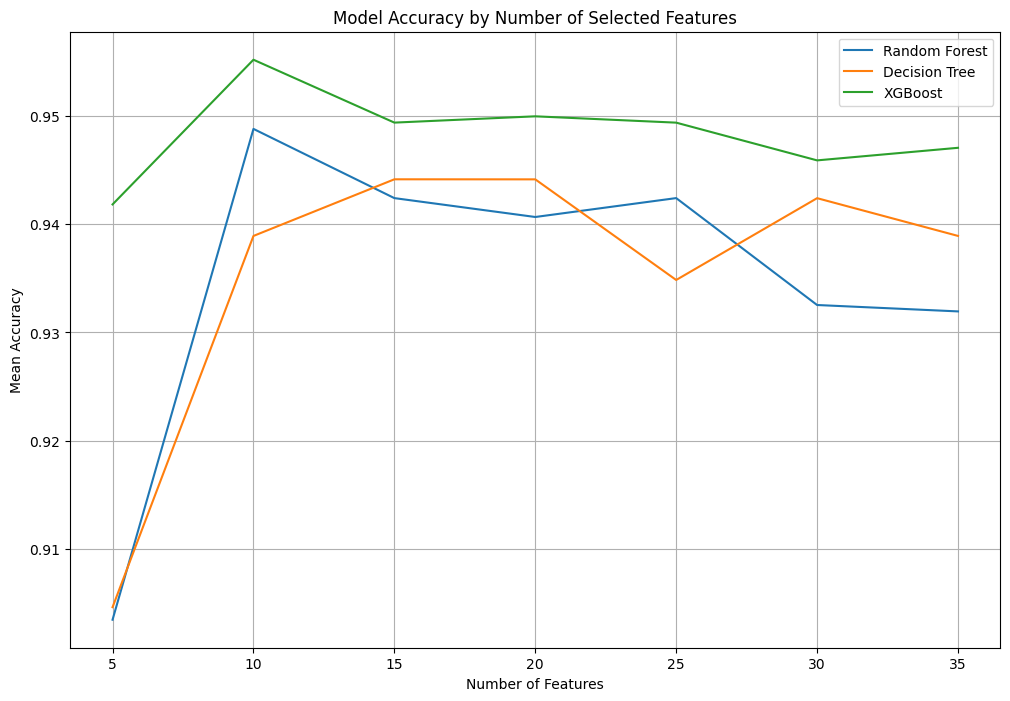

In [19]:
import matplotlib.pyplot as plt

# Define the models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Define the range of features to test
features_range = [5, 10, 15, 20, 25, 30, 35]

# Initialize plot for accuracy results
plt.figure(figsize=(12, 8))

# Calculate accuracy for each model with varying feature counts
for model_name, model in models.items():
    accuracy_scores = []
    for n_features in features_range:
        # Initialize RFE to select a specific number of features
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        
        # Transform data to include only selected features
        X_selected = rfe.fit_transform(X_train, y_train)
        
        # Perform cross-validation and calculate accuracy
        accuracy = cross_val_score(model, X_selected, y_train, cv=k_folds, scoring='accuracy')
        
        # Store the average accuracy score for the current feature count
        accuracy_scores.append(np.mean(accuracy))
    
    # Plot accuracy scores for each model by feature count
    plt.plot(features_range, accuracy_scores, label=model_name)

# Customize and display the plot
plt.xlabel("Number of Features")
plt.ylabel("Mean Accuracy")
plt.title("Model Accuracy by Number of Selected Features")
plt.legend()
plt.grid()
plt.show()

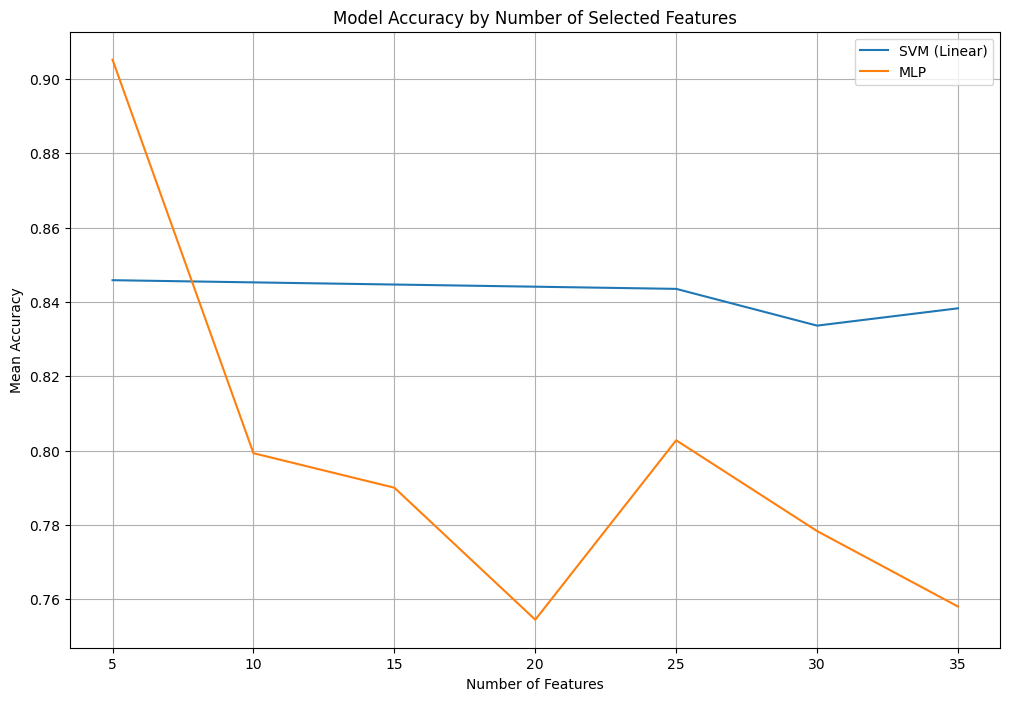

In [24]:
# Define the models to evaluate
models = {
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}



# Define the range of features to test
features_range = [5, 10, 15, 20, 25, 30, 35]

# Initialize plot for accuracy results
plt.figure(figsize=(12, 8))

# Calculate accuracy for each model with varying feature counts
for model_name, model in models.items():
    accuracy_scores = []
    for n_features in features_range:
        # Initialize SelectKBest to select a specific number of features
        selector = SelectKBest(score_func=f_classif, k=n_features)
        
        # Transform data to include only selected features
        X_selected = selector.fit_transform(X_train, y_train)
        
        # Perform cross-validation and calculate accuracy
        accuracy = cross_val_score(model, X_selected, y_train, cv=k_folds, scoring='accuracy')
        
        # Store the average accuracy score for the current feature count
        accuracy_scores.append(np.mean(accuracy))
    
    # Plot accuracy scores for each model by feature count
    plt.plot(features_range, accuracy_scores, label=model_name)

# Customize and display the plot
plt.xlabel("Number of Features")
plt.ylabel("Mean Accuracy")
plt.title("Model Accuracy by Number of Selected Features")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Define the parameter grids without the 'classifier__' prefix
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize the GridSearchCV for each model
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_svm.fit(X_train, y_train)
grid_search_mlp.fit(X_train, y_train)

# Print the best parameters and best scores for each model
print("\nSVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Best Score:", grid_search_svm.best_score_)

print("\nMLP Best Parameters:", grid_search_mlp.best_params_)
print("MLP Best Score:", grid_search_mlp.best_score_)


SVM Best Parameters: {'C': 0.1, 'kernel': 'linear'}
SVM Best Score: 0.838868736863516

MLP Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
MLP Best Score: 0.7981337717811378


In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate the model using cross-validation and calculate metrics
def evaluate_model(model, X, y, cv):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    print(f"Accuracy: {accuracy.mean():.4f} ± {accuracy.std():.4f}")
    print(f"Precision: {precision.mean():.4f} ± {precision.std():.4f}")
    print(f"Recall: {recall.mean():.4f} ± {recall.std():.4f}")
    print(f"F1 Score: {f1.mean():.4f} ± {f1.std():.4f}\n")

# Best hyperparameters for each model
dt_params = {'max_depth': None, 'min_samples_split': 10}
rf_params = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5}
xgb_params = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}

# Evaluating models with specified numbers of features
print("Evaluating models based on specified number of features...\n")

# Decision Tree with top 15 features
pipeline_dt = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=15)),
    ('classifier', DecisionTreeClassifier(**dt_params, random_state=42))
])
print("Decision Tree Model Results with 15 Features:")
evaluate_model(pipeline_dt, X_train, y_train, skf)

# Random Forest with top 10 features
pipeline_rf = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=10)),
    ('classifier', RandomForestClassifier(**rf_params, random_state=42))
])
print("Random Forest Model Results with 10 Features:")
evaluate_model(pipeline_rf, X_train, y_train, skf)

# XGBoost with top 10 features
pipeline_xgb = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=10)),
    ('classifier', XGBClassifier(**xgb_params))
])
print("XGBoost Model Results with 10 Features:")
evaluate_model(pipeline_xgb, X_train, y_train, skf)

Evaluating models based on specified number of features...

Decision Tree Model Results with 15 Features:
Accuracy: 0.9424 ± 0.0085
Precision: 0.9161 ± 0.0446
Recall: 0.8732 ± 0.0628
F1 Score: 0.8859 ± 0.0527

Random Forest Model Results with 10 Features:
Accuracy: 0.9395 ± 0.0299
Precision: 0.9500 ± 0.0198
Recall: 0.9210 ± 0.0185
F1 Score: 0.8927 ± 0.0510

XGBoost Model Results with 10 Features:
Accuracy: 0.9604 ± 0.0089
Precision: 0.9408 ± 0.0240
Recall: 0.9193 ± 0.0369
F1 Score: 0.9337 ± 0.0147



In [38]:
svm_params = {'C': 0.1, 'kernel': 'linear'}
mlp_params = {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

print("Evaluating models with top 10 features...\n")

# SVM Model with top 10 features
pipeline_svm = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=10)),
    ('classifier', SVC(**svm_params, random_state=42))
])
print("SVM Model Results with 10 Features:")
evaluate_model(pipeline_svm, X_train, y_train, skf)

Evaluating models with top 10 features...

SVM Model Results with 10 Features:
Accuracy: 0.8406 ± 0.0034
Precision: 0.8095 ± 0.0418
Recall: 0.7334 ± 0.0442
F1 Score: 0.7542 ± 0.0268



In [43]:
# MLP Model with top 10 features
mlp_params = {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
pipeline_mlp = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=5)),
    ('classifier', MLPClassifier(**mlp_params, random_state=42))
])
print("MLP Model Results with 10 Features:")
evaluate_model(pipeline_mlp, X_train, y_train, skf)

MLP Model Results with 10 Features:
Accuracy: 0.8243 ± 0.0570
Precision: 0.8379 ± 0.0402
Recall: 0.7005 ± 0.0485
F1 Score: 0.6930 ± 0.1834



In [42]:
# MLP Model with top 10 features
mlp_params = {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
pipeline_mlp = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=5)),
    ('classifier', MLPClassifier(**mlp_params, random_state=42))
])
print("MLP Model Results with 10 Features:")
evaluate_model(pipeline_mlp, X_train, y_train, skf)

MLP Model Results with 10 Features:
Accuracy: 0.8284 ± 0.0566
Precision: 0.8242 ± 0.0138
Recall: 0.7531 ± 0.0595
F1 Score: 0.6826 ± 0.1503



In [44]:
#testing on test set
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 200,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}


pipeline_xgb = Pipeline([
    ('select', SelectKBest(mutual_info_classif, k=10)),
    ('classifier', XGBClassifier(**xgb_params))
])


pipeline_xgb.fit(X_train, y_train)


y_pred = pipeline_xgb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost Model Results on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

XGBoost Model Results on Test Set:
Accuracy: 0.9488
Precision: 0.9114
Recall: 0.9474
F1 Score: 0.9290


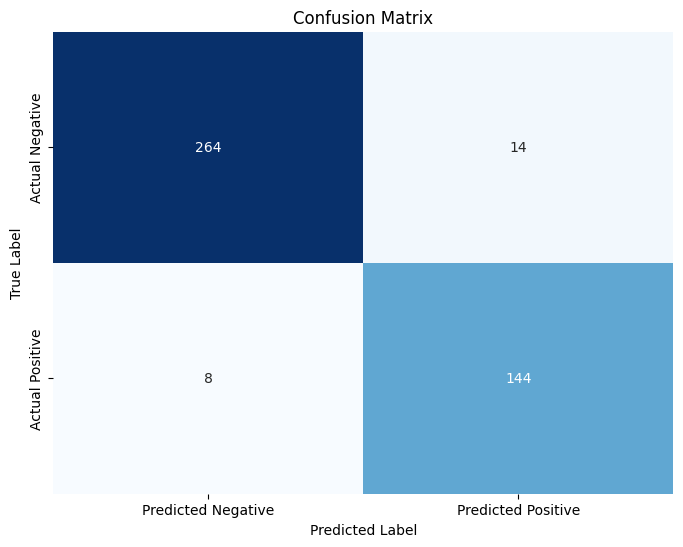

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       278
           1       0.91      0.95      0.93       152

    accuracy                           0.95       430
   macro avg       0.94      0.95      0.94       430
weighted avg       0.95      0.95      0.95       430



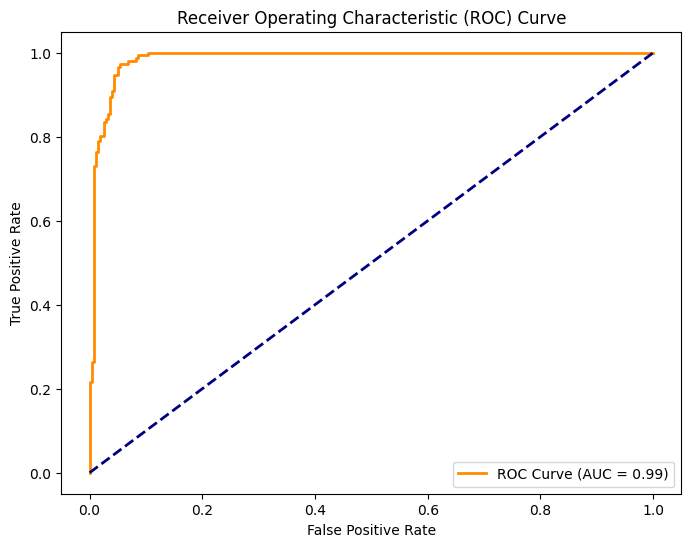

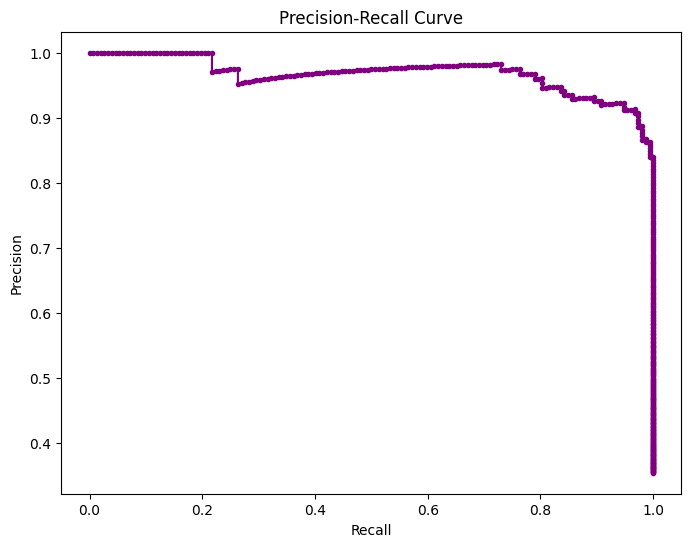

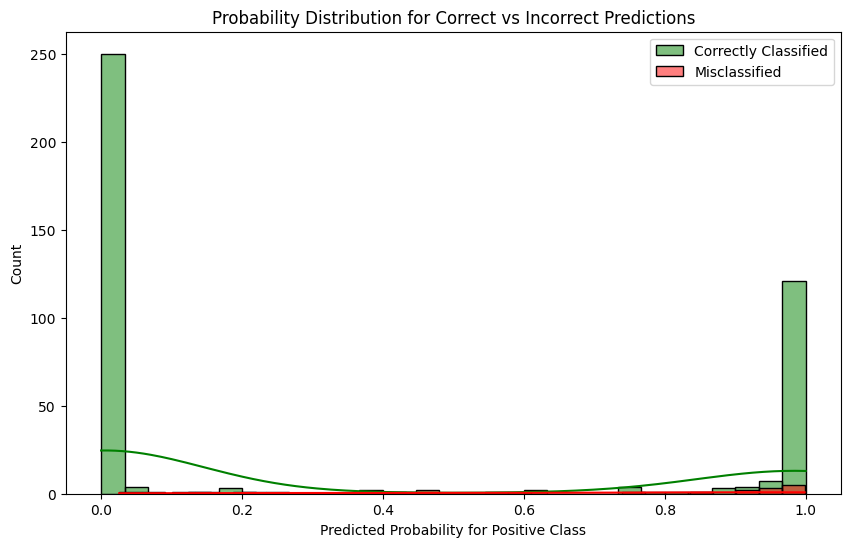

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score

# Make predictions on the test set with probabilities for each class
y_pred = pipeline_xgb.predict(X_test)
y_pred_proba = pipeline_xgb.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

# 1. Generate a Confusion Matrix
# This matrix shows the counts of True Positives, False Positives, False Negatives, and True Negatives.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2. Print Classification Report
# This report gives detailed metrics (precision, recall, F1) for each class.
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 3. ROC Curve and AUC Score
# This curve illustrates the model's performance across different threshold values for binary classification.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
# The Precision-Recall curve is helpful when we want to balance precision and recall effectively.
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 5. Probability Distribution for Correct vs Incorrect Predictions
# Analyze the model's confidence by plotting the predicted probabilities for correct and incorrect predictions.
correct_indices = (y_test == y_pred)
incorrect_indices = ~correct_indices

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba[correct_indices], bins=30, color='green', label='Correctly Classified', kde=True)
sns.histplot(y_pred_proba[incorrect_indices], bins=30, color='red', label='Misclassified', kde=True)
plt.xlabel("Predicted Probability for Positive Class")
plt.ylabel("Count")
plt.title("Probability Distribution for Correct vs Incorrect Predictions")
plt.legend()
plt.show()